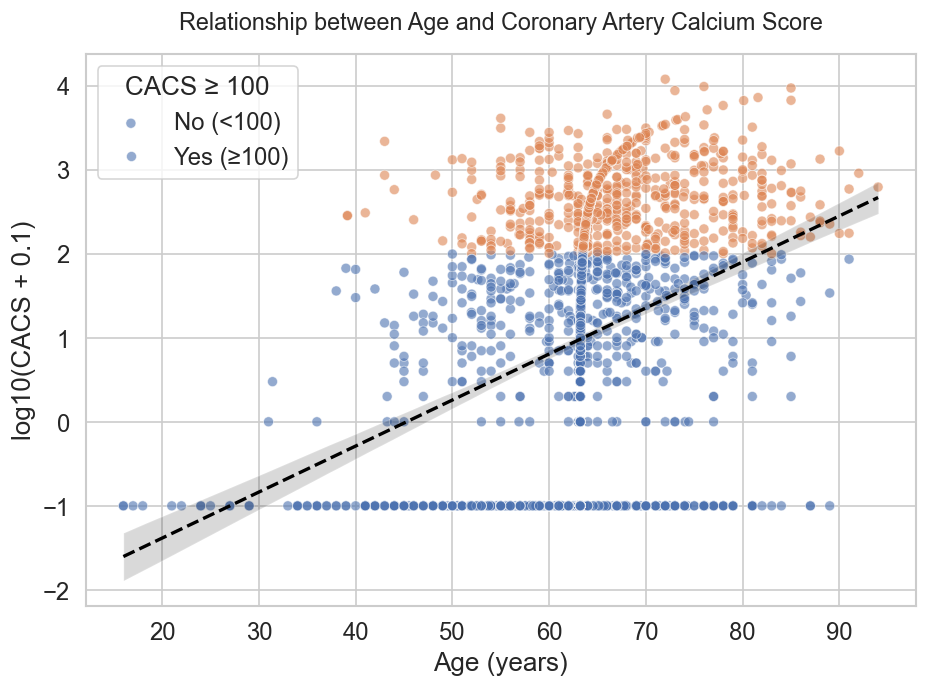

Optimization terminated successfully.
         Current function value: 0.596898
         Iterations 6
Odds Ratio (per 1 year) = 1.08
95% CI = [1.07, 1.10]
p-value = 6.194e-36


In [1]:
# =========================
# Figure 1. Relationship between Age and Coronary Artery Calcium Score (CACS)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset (same folder as this notebook)
df = pd.read_excel("CACS_dataset_with_binary.xlsx")

# 2️⃣ Log-transform CACS for better visualization (avoid log(0))
df["log_CACS"] = df["CACS"].replace(0, 0.1).apply(np.log10)

# 3️⃣ Visualization style
sns.set(style="whitegrid", font_scale=1.3, rc={"figure.dpi":120})

# 4️⃣ Create scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x="age", y="log_CACS",
    hue="CACS_binary", 
    palette={0:"#4C72B0", 1:"#DD8452"},
    alpha=0.6
)
sns.regplot(
    data=df, x="age", y="log_CACS",
    scatter=False, color="black", line_kws={"lw":2, "ls":"--"}
)

# 5️⃣ Labels and aesthetics
plt.title("Relationship between Age and Coronary Artery Calcium Score", pad=15, fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("log10(CACS + 0.1)")
plt.legend(title="CACS ≥ 100", labels=["No (<100)", "Yes (≥100)"], loc="upper left")
plt.tight_layout()

# 6️⃣ Save high-resolution figure
plt.savefig("Figure1_Age_vs_CACS.png", dpi=600, bbox_inches="tight")

plt.show()

import statsmodels.formula.api as smf
import numpy as np

model = smf.logit("CACS_binary ~ age", data=df).fit()

params = model.params
conf = model.conf_int()
conf["OR"] = params
conf.columns = ["2.5%", "97.5%", "OR"]
conf = np.exp(conf)

or_age = conf.loc["age", "OR"]
ci_lower = conf.loc["age", "2.5%"]
ci_upper = conf.loc["age", "97.5%"]
p_value = model.pvalues["age"]

print(f"Odds Ratio (per 1 year) = {or_age:.2f}")
print(f"95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"p-value = {p_value:.3e}")
